In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sn
%matplotlib inline
sn.set_style('whitegrid')
pl.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('D:/abhipraja/codes/dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<AxesSubplot:xlabel='Attrition', ylabel='count'>

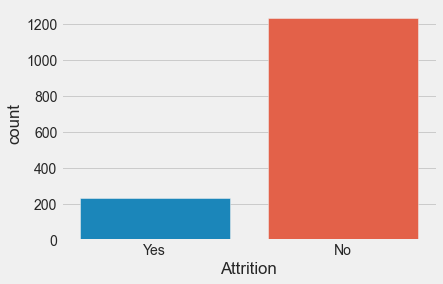

In [3]:
sn.countplot(x='Attrition',data=df)

In [4]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis='columns',inplace=True)

In [5]:
catergoricalCol=[]
for column in df.columns:
    if df[column].dtype==object and len(df[column].unique())<=50:
        catergoricalCol.append(column)
df['Attrition']=df.Attrition.astype('category').cat.codes

In [6]:
catergoricalCol.remove('Attrition')

In [7]:
catergoricalCol

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [8]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
for column in catergoricalCol:
    df[column]=label.fit_transform(df[column])

In [9]:
from sklearn.model_selection import train_test_split
x=df.drop('Attrition',axis=1)
y=df.Attrition
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def printScore(clf,xtrain,ytrain,xtest,ytest,train=True):
    if train==True:
        pred=clf.predict(xtrain)
        clfReport=pd.DataFrame(classification_report(ytrain,pred,output_dict=True))
        print(f"Accuracy Score: {accuracy_score(ytrain, pred) * 100:.2f}%")
        print(f"CLASSIFICATION REPORT:\n{clfReport}")
        print(f"Confusion Matrix: \n {confusion_matrix(ytrain, pred)}\n")
    elif train==False:
        pred = clf.predict(xtest)
        clfReport = pd.DataFrame(classification_report(ytest, pred, output_dict=True))        
        print(f"Accuracy Score: {accuracy_score(ytest, pred) * 100:.2f}%")
        print(f"CLASSIFICATION REPORT:\n{clfReport}")
        print(f"Confusion Matrix: \n {confusion_matrix(ytest, pred)}\n")

In [11]:
from sklearn.tree import DecisionTreeClassifier
treeClf=DecisionTreeClassifier(random_state=42)
treeClf.fit(xtrain,ytrain)
printScore(treeClf,xtrain,ytrain,xtest,ytest,train=True)
printScore(treeClf,xtrain,ytrain,xtest,ytest,train=False)

Accuracy Score: 100.00%
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Accuracy Score: 77.78%
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887363   0.259740  0.777778    0.573551      0.800549
recall       0.850000   0.327869  0.777778    0.588934      0.777778
f1-score     0.868280   0.289855  0.777778    0.579067      0.788271
support    380.000000  61.000000  0.777778  441.000000    441.000000
Confusion Matrix: 
 [[323  57]
 [ 41  20]]



In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params={
    'criterion':('gini','entropy'),
    'splitter':('best','random'),
    'max_depth':(list(range(1,20))),
    "min_samples_split":[2, 3, 4], 
    'min_samples_leaf':list(range(1,20)),
}

treeClf=DecisionTreeClassifier(random_state=42)
treeCV=GridSearchCV(treeClf,params,scoring='accuracy',n_jobs=-1,verbose=1,cv=3)
treeCV.fit(xtrain,ytrain)
bestParams=treeCV.best_params_
print(f'best paramters: {bestParams}')

treeClf=DecisionTreeClassifier(**bestParams)
treeClf.fit(xtrain,ytrain)
printScore(treeClf,xtrain,ytrain,xtest,ytest,train=True)
printScore(treeClf,xtrain,ytrain,xtest,ytest,train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy Score: 88.82%
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.906388    0.752066  0.888241     0.829227      0.879993
recall       0.964830    0.517045  0.888241     0.740938      0.888241
f1-score     0.934696    0.612795  0.888241     0.773745      0.879638
support    853.000000  176.000000  0.888241  1029.000000   1029.000000
Confusion Matrix: 
 [[823  30]
 [ 85  91]]

Accuracy Score: 84.35%
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887781   0.400000  0.843537    0.643890      0.820310
recall       0.936842   0.262295  0.843537    0.599569      0.843537
f1-score     0.911652   0.316832  0.843537    0.614242      0.829375
support    380.000000  61.000000  0.843537

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfClf=RandomForestClassifier(n_estimators=100)
rfClf.fit(xtrain,ytrain)

printScore(rfClf,xtrain,ytrain,xtest,ytest,train=True)
printScore(rfClf,xtrain,ytrain,xtest,ytest,train=False)

Accuracy Score: 100.00%
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Accuracy Score: 86.39%
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.872093   0.545455  0.863946    0.708774      0.826912
recall       0.986842   0.098361  0.863946    0.542601      0.863946
f1-score     0.925926   0.166667  0.863946    0.546296      0.820904
support    380.000000  61.000000  0.863946  441.000000    441.000000
Confusion Matrix: 
 [[375   5]
 [ 55   6]]



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]

random_grid={'n_estimators':n_estimators,
'max_features':max_features,
'max_depth':max_depth,
'min_samples_split':min_samples_split,
'min_samples_leaf':min_samples_leaf,
'bootstrap':bootstrap
}

rfClf=RandomForestClassifier(random_state=42)
rfCv=RandomizedSearchCV(estimator=rfClf,scoring='f1',param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)
rfCv.fit(xtrain,ytrain)
rfBestParams=rfCv.best_params_
print(f'best parameters:{rfBestParams}')
rfClf=RandomForestClassifier(**rfBestParams)
rfClf.fit(xtrain,ytrain)
printScore(rfClf,xtrain,ytrain,xtest,ytest,train=True)
printScore(rfClf,xtrain,ytrain,xtest,ytest,train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


best parameters:{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': False}


c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy Score: 100.00%
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Accuracy Score: 85.94%
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.869767   0.454545   0.85941    0.662156      0.812333
recall       0.984211   0.081967   0.85941    0.533089      0.859410
f1-score     0.923457   0.138889   0.85941    0.531173      0.814934
support    380.000000  61.000000   0.85941  441.000000    441.000000
Confusion Matrix: 
 [[374   6]
 [ 56   5]]



In [17]:
from sklearn.ensemble import RandomForestClassifier

n_estimators=[100,500,1000,1500]
max_features=['auto','sqrt']
max_depth=[2,3,5]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4,10]
bootstrap=[True,False]

paramsGrid={
'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap
}

rfClf=RandomForestClassifier(random_state=42)
rfCv=GridSearchCV(rfClf,paramsGrid,scoring='f1',cv=3,verbose=2,n_jobs=-1)

rfCv.fit(xtrain,ytrain)
bestParams=rfCv.best_params_
print(f'best parameters: {bestParams}')

rfClf=RandomForestClassifier(**bestParams)
rfClf.fit(xtrain,ytrain)

printScore(rfClf,xtrain,ytrain,xtest,ytest,train=True)
printScore(rfClf,xtrain,ytrain,xtest,ytest,train=False)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1500}


c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy Score: 100.00%
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Accuracy Score: 86.17%
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.871795   0.500000  0.861678    0.685897      0.820367
recall       0.984211   0.098361  0.861678    0.541286      0.861678
f1-score     0.924598   0.164384  0.861678    0.544491      0.819444
support    380.000000  61.000000  0.861678  441.000000    441.000000
Confusion Matrix: 
 [[374   6]
 [ 55   6]]

